In [1]:
# MultiCollinearity with Variance Inflation Factor

In [2]:
# Collinearity is the state where two variables are highly correalted and contain similar Information about
# the variance a given dataset.
# Multicollinearity on the other hand is more troublesome to detect because it emerges when three or more 
# variables, which are highly correlted, are included within a model

# A common R function used for testing regression assumptions and specifically mulitcolinerity is "VIF()" and 
# unlike many statistical concepts, its formula is straightforward.

#             V.I.F = 1/ (1-sqr(R) ).

# The variance inflation factor (VIF) is a measure of colinearity among predictor variables within a multiple 
# regression. It is a measure for the increase of the variance of the parameter estimates if an additional
# variable in a model. It is calculated by taking the ratio of the variance of all a given model's betas divide
# by the variance of a single beta if it were fit alone dataset

# One recommendation is that if VIF is greater than 5, then the explanatory variable given by exog_idx is 
# highly collinear with the other explanatory variables, and the parameter estimates will have large standard
# errors becaused of this

# This makes the effects of X1 on Y difficult to distinguish from the effects of X2 on Y.

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
url = 'https://raw.githubusercontent.com/Bhushan0130/Datasets/main/diabetes.csv'
df = pd.read_csv(url)

In [17]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [18]:
df.shape

(768, 9)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

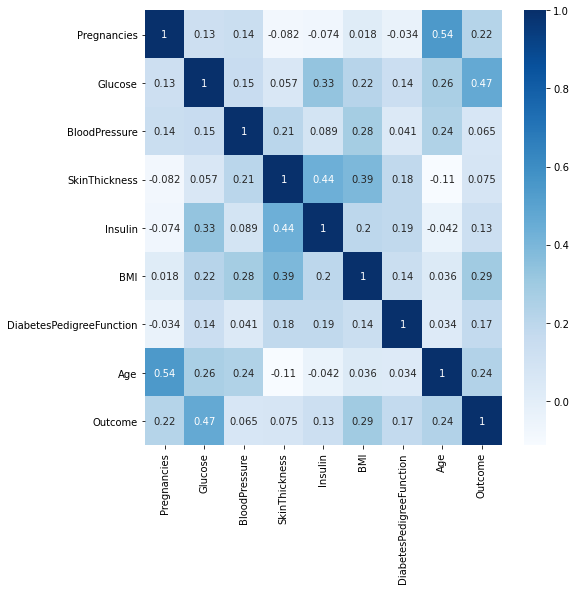

In [27]:
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

In [33]:
df.isnull().sum().sum()
df.shape

(768, 9)

In [35]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
print( 'X shape', x.shape)
print( 'Y shape', y.shape)

X shape (768, 8)
Y shape (768,)


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x.shape[1]

8

In [47]:
def cal_vif(data):
    vif =  pd.DataFrame()
    vif['Feature Name'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i)  for i in range(data.shape[1])]
    return (vif)
    

In [49]:
cal_vif(x)

,Feature Name,VIF
0,Pregnancies,3.275748
1,Glucose,16.725078
2,BloodPressure,14.619512
3,SkinThickness,4.008696
4,Insulin,2.063689
5,BMI,18.408884
6,DiabetesPedigreeFunction,3.195626
7,Age,13.492985


In [50]:
x.drop(columns = 'Glucose', axis = 1, inplace = True)
x.shape

(768, 7)

In [52]:
cal_vif(x)

,Feature Name,VIF
0,Pregnancies,3.273150
1,BloodPressure,14.050661
2,SkinThickness,3.899498
3,Insulin,1.860167
4,BMI,14.940294
5,DiabetesPedigreeFunction,3.143966
6,Age,11.867511


In [54]:
x.drop(columns = 'BMI', axis = 1, inplace = True)
x.shape

(768, 6)

In [56]:
x.head(2)

,Pregnancies,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,72,35,0,0.627,50
1,1,66,29,0,0.351,31


In [57]:
cal_vif(x)

,Feature Name,VIF
0,Pregnancies,3.266130
1,BloodPressure,9.940457
2,SkinThickness,3.475014
3,Insulin,1.859553
4,DiabetesPedigreeFunction,3.026709
5,Age,10.896809


In [59]:
# here only few columns are left 
# this is just for practice but we should make sure about more data loss should not be present for 
# performing further process
# multicoliearity above 12 leads high multicollinearity